In [ ]:
import os
import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split

# Unzip dataset

In [ ]:
# !unzip /content/drive/MyDrive/kvasir-dataset-v2.zip -d /content/drive/MyDrive/

# Define paths

In [ ]:
# Set the paths to source dataset and destination folders
source_dataset_path = "/content/drive/MyDrive/kvasir-dataset-v2"
train_dataset_path = "drive/MyDrive/dataset/train"
test_dataset_path = "drive/MyDrive/dataset/test"

# Number of images in each class

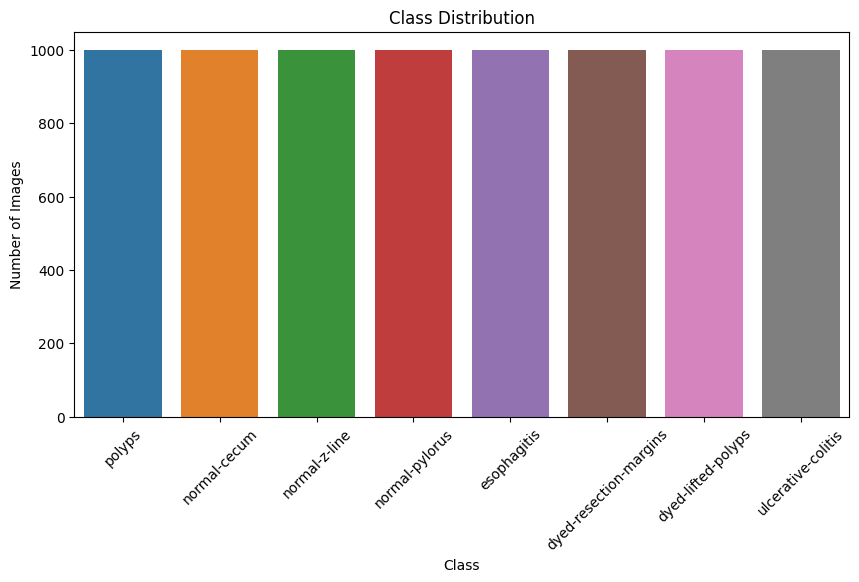

In [ ]:
# List all subdirectories (classes) in the source dataset directory
classes = os.listdir(source_dataset_path)

# Count the number of images in each class
class_counts = [len(os.listdir(os.path.join(source_dataset_path, class_name))) for class_name in classes]

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=class_counts)
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

# Split dataset into train and test and create new dataset
I've split an image dataset into training and testing sets for each class. By utilizing the train_test_split function, 80% of the images are allocated for training and 20% for testing. Subdirectories within the train and test datasets were created, and the images were copied accordingly.

In [ ]:
# Create destination directories if they don't exist
os.makedirs(train_dataset_path, exist_ok=True)
os.makedirs(test_dataset_path, exist_ok=True)


# Split data into train and test sets for each class
for class_name in classes:
    class_path = os.path.join(source_dataset_path, class_name)
    images = os.listdir(class_path)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    train_class_path = os.path.join(train_dataset_path, class_name)
    test_class_path = os.path.join(test_dataset_path, class_name)

    os.makedirs(train_class_path, exist_ok=True)
    os.makedirs(test_class_path, exist_ok=True)

    for image in train_images:
        src = os.path.join(class_path, image)
        dst = os.path.join(train_class_path, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(class_path, image)
        dst = os.path.join(test_class_path, image)
        shutil.copy(src, dst)

print("Dataset split completed.")

Dataset split completed.


# Number of images for each dataset

In [ ]:
train_image_ids = []
test_image_ids = []

for dir in os.listdir(train_dataset_path):
  image_ids = [file.split('.')[0] for file in os.listdir(os.path.join(train_dataset_path,dir))]
  train_image_ids += image_ids

for dir in os.listdir(test_dataset_path):
  image_ids = [file.split('.')[0] for file in os.listdir(os.path.join(test_dataset_path,dir))]
  test_image_ids += image_ids

print(f'Total image in original dataset for {len(classes)} classes: {sum(class_counts)}')
print(f'Total image in train dataset for {len(classes)} classes: {len(train_image_ids)}')
print(f'Total image in test dataset for {len(classes)} classes: {len(test_image_ids)}')

Total image in original dataset for 8 classes: 8000
Total image in train dataset for 8 classes: 6400
Total image in test dataset for 8 classes: 1600


# Bar chart for train and test datasets

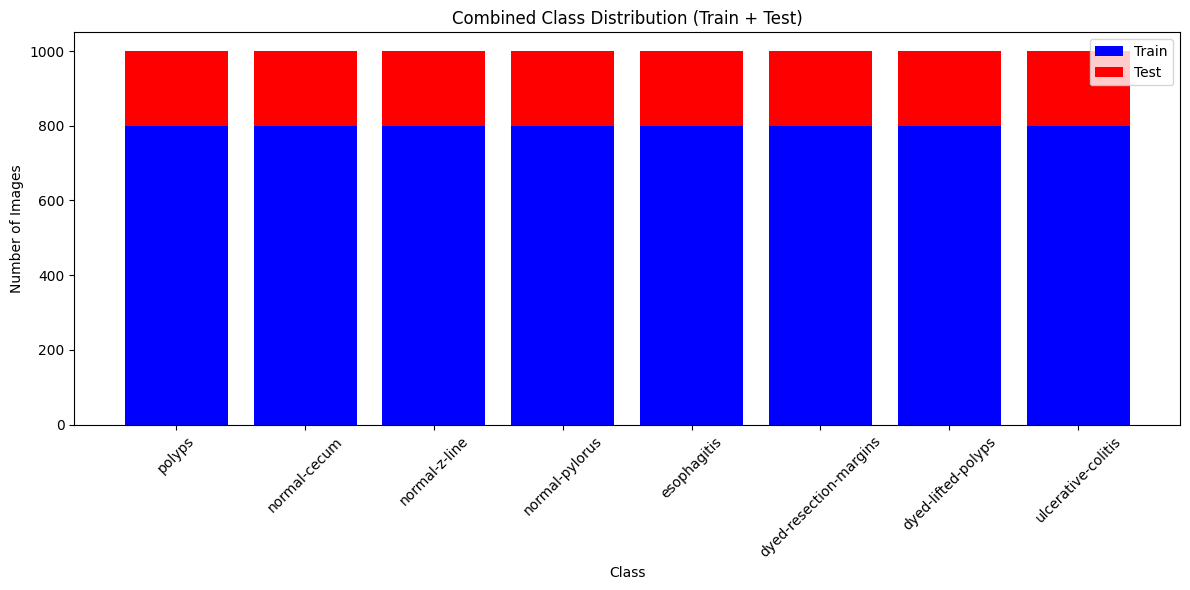

In [ ]:
train_class_counts = [len(os.listdir(os.path.join(train_dataset_path, class_name))) for class_name in classes]
test_class_counts = [len(os.listdir(os.path.join(test_dataset_path, class_name))) for class_name in classes]

train_classes = os.listdir(train_dataset_path)
test_classes = os.listdir(test_dataset_path)


# Create positions for the bars
x = np.arange(len(train_classes))

# Create a bar plot with stacked bars for train and test datasets
plt.figure(figsize=(12, 6))
p1 = plt.bar(x, train_class_counts, color='b', label='Train')
p2 = plt.bar(x, test_class_counts, bottom=train_class_counts, color='r', label='Test')

plt.xticks(x, train_classes, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Combined Class Distribution (Train + Test)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate statistics

In [ ]:
# Calculate average dimensions and color channel statistics
dimensions = []
channels = []

for class_name in classes:
    class_path = os.path.join(source_dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = mpimg.imread(image_path)
        dimensions.append(image.shape[:2])
        channels.append(image.shape[2])

avg_dimensions = np.mean(dimensions, axis=0)
avg_channels = np.mean(channels)

print("Average Dimensions:", avg_dimensions)
print("Average Number of Channels:", avg_channels)


Average Dimensions: [740.712  979.0945]
Average Number of Channels: 3.0


# Display sample images from each class

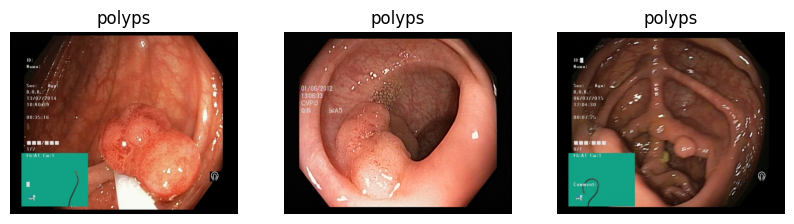

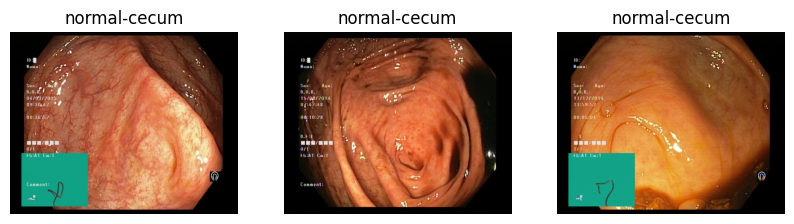

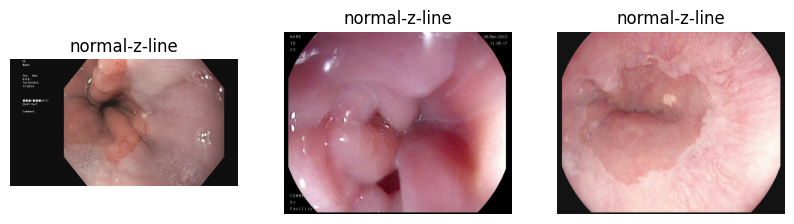

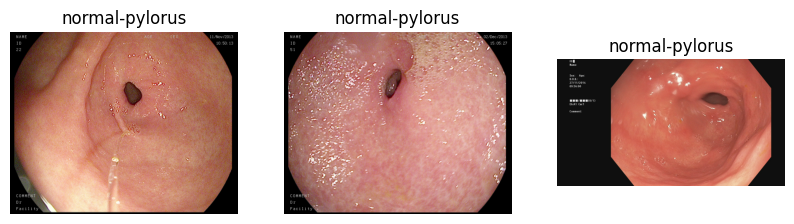

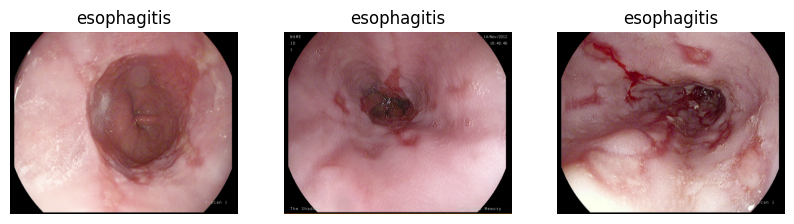

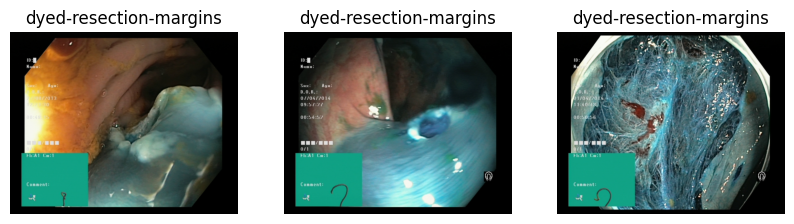

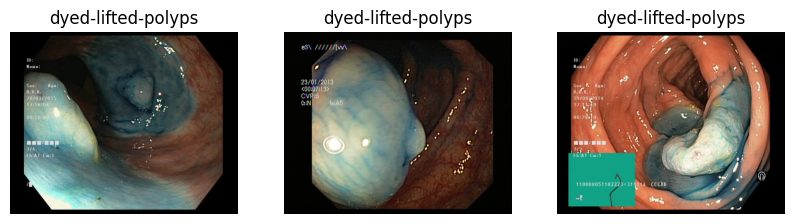

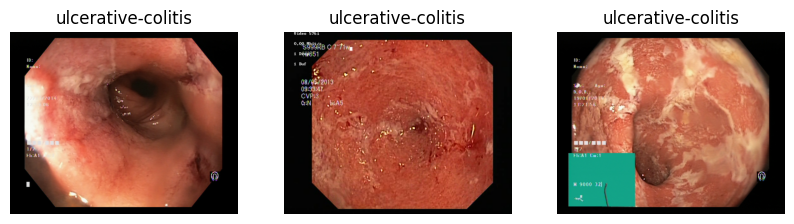

In [ ]:
# List all subdirectories (classes) in the source dataset directory
classes = os.listdir(source_dataset_path)

# Display sample images from each class
num_samples_per_class = 3

for class_name in classes:
    class_path = os.path.join(source_dataset_path, class_name)
    images = os.listdir(class_path)[:num_samples_per_class]

    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(images):
        image_path = os.path.join(class_path, image_name)
        image = mpimg.imread(image_path)

        plt.subplot(1, num_samples_per_class, i + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

    plt.show()